## Deep Learning with TensorFlow 2.0 Tutorial - Building Your First ANN with TensorFlow 2.0

In [1]:
# pip install tensorflow==2.0.0-rc0
# pip install tensorflow-gpu==2.0.0-rc0

Watch Full Lesson Here: https://youtu.be/JHNX5ugPa7s

#### What is ANN?

Artificial Neural Networks (ANN) is a supervised learning system built of a large number of simple elements, called neurons or perceptrons. Each neuron can make simple decisions, and feeds those decisions to other neurons, organized in interconnected layers.

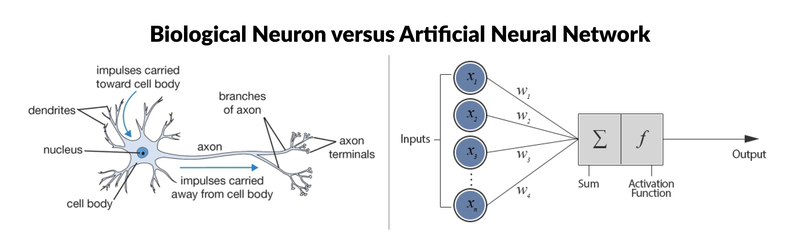

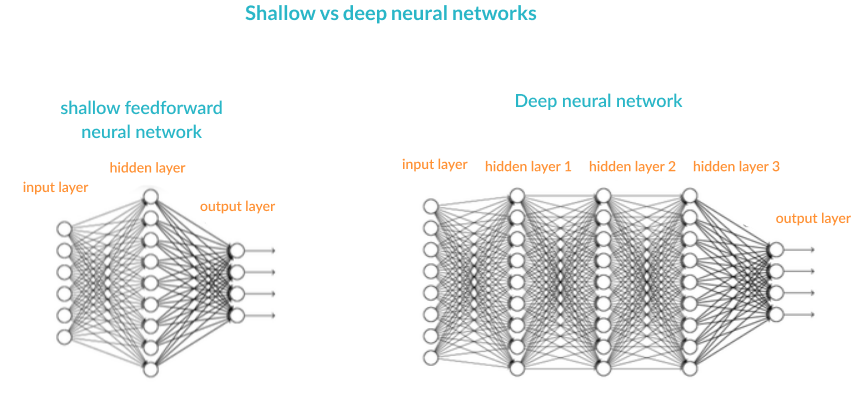

#### What is Activation Function?

If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree.

- Sigmoid
- Tanh
- ReLu
- LeakyReLu
- SoftMax

#### What is Back Propagation? 

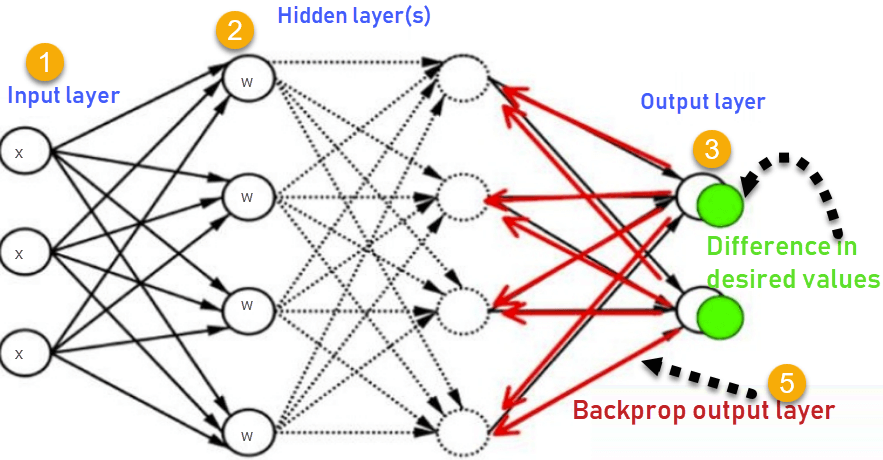

#### Steps for building your first ANN 

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed

In [2]:
# pip install tensorflow==2.0.0-rc0
# pip install tensorflow-gpu==2.0.0-rc0

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [4]:
print(tf.__version__)

2.0.0-rc0


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Feature Standardization 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

### Build ANN 

In [20]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
X.shape[1]

11

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

W0828 21:45:22.904364 13292 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 171us/sample - loss: 0.4589 - accuracy: 0.8030
Epoch 2/10
8000/8000 [==============================] - 1s 96us/sample - loss: 0.3964 - accuracy: 0.8321
Epoch 3/10
8000/8000 [==============================] - 1s 93us/sample - loss: 0.3616 - accuracy: 0.8500
Epoch 4/10
8000/8000 [==============================] - 1s 101us/sample - loss: 0.3480 - accuracy: 0.8541
Epoch 5/10
8000/8000 [==============================] - 1s 113us/sample - loss: 0.3435 - accuracy: 0.8580
Epoch 6/10
8000/8000 [==============================] - 1s 124us/sample - loss: 0.3383 - accuracy: 0.8589
Epoch 7/10
8000/8000 [==============================] - 1s 105us/sample - loss: 0.3362 - accuracy: 0.8630
Epoch 8/10
8000/8000 [==============================] - 1s 98us/sample - loss: 0.3337 - accuracy: 0.8614
Epoch 9/10
8000/8000 [==============================] - 1s 103us/sample - loss: 0.3320 - accuracy: 0.8616
Epoch 10/10
8000/8000 [====

In [24]:
y_pred = model.predict_classes(X_test)

In [25]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [26]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
1940    1
2090    0
3298    0
8364    1
9485    0
3088    0
617     1
7211    0
9253    0
9743    0
1546    0
3475    0
6623    0
7594    0
2347    1
9583    0
6473    0
8104    0
6486    0
9747    1
6187    0
2458    0
5875    0
9317    1
7170    0
       ..
9086    0
2249    0
1971    0
8379    1
6450    0
7223    1
6143    0
7582    0
4679    0
7060    0
9709    0
1045    0
7141    0
5148    0
4868    0
3407    0
5400    0
9241    0
9454    0
1046    1
7791    0
959     0
6488    0
1487    1
9574    0
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [27]:
model.evaluate(X_test, y_test.to_numpy())

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3408954939842224, 0.859]

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
confusion_matrix(y_test, y_pred)

array([[1508,   85],
       [ 197,  210]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.859